In [1]:
import pandas as pd

daily_agg_df = pd.read_csv('./datasets/Raw Datset II.Daily aggregates_Gray_LaPlante_PAB_2012.dat', delimiter='\t')
rg_det_df = pd.read_csv('./datasets/Raw Datset III.Responsible gambling details_Gray_LaPlante_PAB_2012.dat', delimiter='\t')
demog_df = pd.read_csv('./datasets/Raw Datset I.Demographics_Gray_LaPlante_PAB_2012.dat', delimiter='\t')




C:\Users\abhiv\AppData\Local\Temp\ipykernel_10620\1360108055.py:3: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  daily_agg_df = pd.read_csv('./datasets/Raw Datset II.Daily aggregates_Gray_LaPlante_PAB_2012.dat', delimiter='\t')


In [2]:
rg_det_df

,UserID,RGsumevents,RGFirst_Date,RGLast_date,Event_type_first,Interventiontype_first
0,2169867,1,11/19/2009,11/19/2009,9,18
1,7035862,1,11/15/2009,11/15/2009,9,18
2,5911218,1,11/8/2009,11/8/2009,9,18
3,5872708,1,11/3/2009,11/3/2009,9,18
4,5746942,2,10/18/2009,11/3/2009,9,18
...,...,...,...,...,...,...
2063,2451840,5,,11/3/2009,12,
2064,9140426,1,8/19/2009,8/19/2009,10,
2065,2590026,2,8/5/2009,8/6/2009,10,
2066,1023918,1,4/9/2009,4/9/2009,6,


In [3]:
demog_df

,USERID,RG_case,CountryName,LanguageName,Gender,YearofBirth,Registration_date,First_Deposit_Date
0,2975944,1,Germany,German,M,1970,6/2/2006,6/9/2006
1,9822065,1,Germany.COM,German,F,1963,11/21/2009,11/21/2009
2,9622454,1,France.COM,French,F,1981,10/19/2009,10/19/2009
3,9619356,1,Italy.IT,Italian,F,1975,10/18/2009,10/18/2009
4,9593498,1,Germany.COM,German,F,1990,10/14/2009,10/14/2009
...,...,...,...,...,...,...,...,...
4129,107292,0,Austria,German,M,1975,7/9/2000,7/9/2000
4130,92140,0,Austria,German,M,1973,6/25/2000,6/25/2000
4131,80281,0,Austria,German,M,1970,6/13/2000,6/13/2000
4132,74438,0,Austria,German,M,1975,6/9/2000,6/9/2000


In [4]:
daily_agg_df

,UserID,Date,ProductType,Turnover,Hold,NumberofBets
0,31965,5/8/2000,1,15.3388,15.3388,1
1,31965,5/10/2000,1,34.1594,34.1594,5
2,31965,5/18/2000,1,24.5419,24.5419,4
3,31965,5/22/2000,1,2.5309,2.5309,1
4,31965,5/23/2000,1,15.3387,15.3387,2
...,...,...,...,...,...,...
981777,9200696,10/12/2010,25,,,95
981778,7912483,9/23/2010,25,,,60
981779,9200696,10/11/2010,25,,,2
981780,9200696,10/14/2010,25,,,2


In [5]:
import pandas as pd

# Define a standard date for filling empty and invalid cells
standard_date = pd.to_datetime('01/01/1900', format='%d/%m/%Y', errors='coerce')

# Fill empty and invalid cells with the standard date
daily_agg_df['Date'] = pd.to_datetime(daily_agg_df['Date'], errors='coerce').fillna(standard_date)
demog_df['Registration_date'] = pd.to_datetime(demog_df['Registration_date'], errors='coerce').fillna(standard_date)
demog_df['First_Deposit_Date'] = pd.to_datetime(demog_df['First_Deposit_Date'], errors='coerce').fillna(standard_date)
rg_det_df['RGFirst_Date'] = pd.to_datetime(rg_det_df['RGFirst_Date'], errors='coerce').fillna(standard_date)
rg_det_df['RGLast_date'] = pd.to_datetime(rg_det_df['RGLast_date'], errors='coerce').fillna(standard_date)

# Create new datetime columns
daily_agg_df['Aggregate_Date'] = pd.to_datetime(daily_agg_df['Date'])

daily_agg_df.drop('Date', axis=1, inplace=True)

demog_df['Registration_date'] = pd.to_datetime(demog_df['Registration_date'])
demog_df['First_Deposit_Date'] = pd.to_datetime(demog_df['First_Deposit_Date'])
rg_det_df['RGFirst_Date'] = pd.to_datetime(rg_det_df['RGFirst_Date'])
rg_det_df['RGLast_date'] = pd.to_datetime(rg_det_df['RGLast_date'])

# Rename the 'old_column_name' to 'new_column_name'
daily_agg_df = daily_agg_df.rename(columns={'UserID': 'UserID'})
demog_df = demog_df.rename(columns={'USERID': 'UserID'})
rg_det_df = rg_det_df.rename(columns={'UserID': 'UserID'})

In [6]:
daily_agg_df
product_type_frequencies = daily_agg_df['ProductType'].value_counts()
print(product_type_frequencies)

1     399410
2     331828
10    127223
8      37749
15     25646
4      20749
6      13558
3       7539
14      7310
19      6122
7       1741
23      1215
5        559
17       506
20       321
22       158
9         67
21        38
24        35
25         7
16         1
Name: ProductType, dtype: int64


In [7]:
daily_agg_df_t=daily_agg_df.tail(10)

In [8]:
daily_agg_df_t




,UserID,ProductType,Turnover,Hold,NumberofBets,Aggregate_Date
981772,4608302,24,,,6,2010-09-17
981773,1285995,24,,,2,2010-07-27
981774,4608302,24,,,3,2010-09-16
981775,7912483,25,,,393,2010-09-24
981776,7912483,25,,,228,2010-09-22
981777,9200696,25,,,95,2010-10-12
981778,7912483,25,,,60,2010-09-23
981779,9200696,25,,,2,2010-10-11
981780,9200696,25,,,2,2010-10-14
981781,9200696,25,,,2,2010-10-24


In [9]:
demog_df

,UserID,RG_case,CountryName,LanguageName,Gender,YearofBirth,Registration_date,First_Deposit_Date
0,2975944,1,Germany,German,M,1970,2006-06-02,2006-06-09
1,9822065,1,Germany.COM,German,F,1963,2009-11-21,2009-11-21
2,9622454,1,France.COM,French,F,1981,2009-10-19,2009-10-19
3,9619356,1,Italy.IT,Italian,F,1975,2009-10-18,2009-10-18
4,9593498,1,Germany.COM,German,F,1990,2009-10-14,2009-10-14
...,...,...,...,...,...,...,...,...
4129,107292,0,Austria,German,M,1975,2000-07-09,2000-07-09
4130,92140,0,Austria,German,M,1973,2000-06-25,2000-06-25
4131,80281,0,Austria,German,M,1970,2000-06-13,2000-06-13
4132,74438,0,Austria,German,M,1975,2000-06-09,2000-06-09


In [10]:
rg_det_df

,UserID,RGsumevents,RGFirst_Date,RGLast_date,Event_type_first,Interventiontype_first
0,2169867,1,2009-11-19,2009-11-19,9,18
1,7035862,1,2009-11-15,2009-11-15,9,18
2,5911218,1,2009-11-08,2009-11-08,9,18
3,5872708,1,2009-11-03,2009-11-03,9,18
4,5746942,2,2009-10-18,2009-11-03,9,18
...,...,...,...,...,...,...
2063,2451840,5,1900-01-01,2009-11-03,12,
2064,9140426,1,2009-08-19,2009-08-19,10,
2065,2590026,2,2009-08-05,2009-08-06,10,
2066,1023918,1,2009-04-09,2009-04-09,6,


In [11]:
merged_df = daily_agg_df.merge(demog_df, on='UserID', how='outer')
merged_df = merged_df.merge(rg_det_df, on='UserID', how='outer')


In [12]:
merged_df['RG_case'].value_counts()

1    811570
0    170233
Name: RG_case, dtype: int64

In [13]:
merged_df

,UserID,ProductType,Turnover,Hold,NumberofBets,Aggregate_Date,RG_case,CountryName,LanguageName,Gender,YearofBirth,Registration_date,First_Deposit_Date,RGsumevents,RGFirst_Date,RGLast_date,Event_type_first,Interventiontype_first
0,31965,1.0,15.3388,15.3388,1,2000-05-08,1,Germany.COM,German,M,1971,1999-09-17,2000-05-08,1.0,2009-03-04,2009-03-04,2.0,8
1,31965,1.0,34.1594,34.1594,5,2000-05-10,1,Germany.COM,German,M,1971,1999-09-17,2000-05-08,1.0,2009-03-04,2009-03-04,2.0,8
2,31965,1.0,24.5419,24.5419,4,2000-05-18,1,Germany.COM,German,M,1971,1999-09-17,2000-05-08,1.0,2009-03-04,2009-03-04,2.0,8
3,31965,1.0,2.5309,2.5309,1,2000-05-22,1,Germany.COM,German,M,1971,1999-09-17,2000-05-08,1.0,2009-03-04,2009-03-04,2.0,8
4,31965,1.0,15.3387,15.3387,2,2000-05-23,1,Germany.COM,German,M,1971,1999-09-17,2000-05-08,1.0,2009-03-04,2009-03-04,2.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981798,1190813,NaN,NaN,NaN,NaN,NaT,0,.,.,M,,1900-01-01,2005-07-01,NaN,NaT,NaT,NaN,NaN
981799,1622440,NaN,NaN,NaN,NaN,NaT,0,.,.,M,,1900-01-01,2005-05-21,NaN,NaT,NaT,NaN,NaN
981800,1108530,NaN,NaN,NaN,NaN,NaT,0,.,.,M,,1900-01-01,2004-08-22,NaN,NaT,NaT,NaN,NaN
981801,683142,NaN,NaN,NaN,NaN,NaT,0,.,.,M,,1900-01-01,2003-05-20,NaN,NaT,NaT,NaN,NaN


In [14]:
merged_df_tsc=merged_df.drop(columns=['RGLast_date','RGFirst_Date','Registration_date','First_Deposit_Date','Gender','LanguageName','CountryName'])
merged_df_tsc=merged_df_tsc #.tail(13000)
filtered_df = merged_df_tsc[merged_df_tsc['ProductType'] == 2]
filtered_df
# Sort the DataFrame by 'user_id' and 'date'
filtered_df = filtered_df.sort_values(by=['UserID', 'Aggregate_Date'])


# 8381254, 8935727, 8986951, 9065100, 9099550, 9206426, 9411611, 9616886
# 908460, 954936, 1740517, 2652627, 2907188, 3222999, 3284620, 3687392, 4172003, 4227662, 4407380, 4648529, 4700436, 4723797, 4808882,

In [15]:
filtered_df['RG_case'].value_counts()

1    294375
0     37453
Name: RG_case, dtype: int64

In [17]:
merged_df_tsc
user_31965
filtered_df

,UserID,ProductType,Turnover,Hold,NumberofBets,Aggregate_Date,RG_case,YearofBirth,RGsumevents,Event_type_first,Interventiontype_first
402,31965,2.0,20.0,20.0,1,2002-11-12,1,1971,1.0,2.0,8
1002,31965,2.0,73.18,18.96,6,2002-11-14,1,1971,1.0,2.0,8
403,31965,2.0,10.0,10.0,1,2002-11-15,1,1971,1.0,2.0,8
1217,31965,2.0,163.28,19.0,9,2002-11-16,1,1971,1.0,2.0,8
1331,31965,2.0,162.34,-97.5,13,2002-11-17,1,1971,1.0,2.0,8
...,...,...,...,...,...,...,...,...,...,...,...
973451,9822065,2.0,10.0,10.0,1,2010-02-09,1,1963,1.0,4.0,13
973463,9822065,2.0,15.0,-3.35,1,2010-03-02,1,1963,1.0,4.0,13
973452,9822065,2.0,1.0,1.0,1,2010-04-21,1,1963,1.0,4.0,13
973456,9822065,2.0,1.0,-2.8,1,2010-06-10,1,1963,1.0,4.0,13


In [18]:
subset_columns = ['Aggregate_Date', 'UserID']

# Identify and drop duplicate rows based on the specified subset of columns
filtered_df = filtered_df.drop_duplicates(subset=subset_columns, keep='first')

# Display the DataFrame after dropping duplicates
print("DataFrame after dropping duplicates:")
print(filtered_df)


DataFrame after dropping duplicates:
         UserID  ProductType Turnover   Hold NumberofBets Aggregate_Date  \
402       31965          2.0     20.0   20.0            1     2002-11-12   
1002      31965          2.0    73.18  18.96            6     2002-11-14   
403       31965          2.0     10.0   10.0            1     2002-11-15   
1217      31965          2.0   163.28   19.0            9     2002-11-16   
1331      31965          2.0   162.34  -97.5           13     2002-11-17   
...         ...          ...      ...    ...          ...            ...   
973451  9822065          2.0     10.0   10.0            1     2010-02-09   
973463  9822065          2.0     15.0  -3.35            1     2010-03-02   
973452  9822065          2.0      1.0    1.0            1     2010-04-21   
973456  9822065          2.0      1.0   -2.8            1     2010-06-10   
973516  9859152          2.0     13.0   13.0            5     2009-11-27   

        RG_case YearofBirth  RGsumevents  Event_ty

In [19]:
filtered_df['RG_case'].value_counts()

null_mask = filtered_df.isna()

# Use sum() to count the null values in each column
null_count = null_mask.sum()

# Display columns with null values and their respective counts
print("Columns with null values and their counts:")
print(null_count[null_count > 0])
filtered_df

filtered_df = filtered_df.fillna(0)


Columns with null values and their counts:
RGsumevents               36498
Event_type_first          36498
Interventiontype_first    36498
dtype: int64


In [20]:
null_mask = user_data_3d.isna()

# Use sum() to count the null values in each column
null_count = null_mask.sum()

# Display columns with null values and their respective counts
print("Columns with null values and their counts:")
print(null_count[null_count > 0])

NameError: name 'user_data_3d' is not defined

In [ ]:
user_data_3d

In [ ]:
filtered_df

In [ ]:
import numpy as np

# Create a sample NumPy array with mixed data types
user_data_array

# Create a boolean mask to identify missing values (None)
missing_values_mask = np.array([item is None for item in user_data_array])

# Count the number of missing values
missing_values_count = np.sum(missing_values_mask)

print("Number of missing values in the NumPy array:", missing_values_count)


In [ ]:
import pandas as pd

# Assuming user_data_3d is your DataFrame

# Check for non-numeric characters, empty strings, NaN, or null values
non_numeric_mask = user_data_3d.applymap(lambda x: not isinstance(x, (int, float)) and not str(x).strip().replace(".", "", 1).isdigit() and pd.notna(x))

# Find the rows and columns with non-numeric values
rows_with_non_numeric = non_numeric_mask.any(axis=1)
columns_with_non_numeric = non_numeric_mask.any()

# Display rows and columns with non-numeric values
print("Rows with non-numeric values:")
print(user_data_3d[rows_with_non_numeric])

print("\nColumns with non-numeric values:")
print(user_data_3d.loc[:, columns_with_non_numeric])


In [233]:
selected_user = user_data_3d.loc[user_data_3d.index == 8656794]
print(selected_user)
# Create a DataFrame containing only the selected user (UserID == 31965)
selected_user = user_data_3d.loc[user_data_3d.index == 8656794]

# Print the data type of each column
print("Data Types of Each Column:")
print(selected_user.dtypes)


                 Turnover                                              \
Aggregate_Date 2002-11-12 2002-11-13 2002-11-14 2002-11-15 2002-11-16   
UserID                                                                  
8656794               0.0        0.0        0.0        0.0        0.0   

                                                                       ...  \
Aggregate_Date 2002-11-17 2002-11-18 2002-11-19 2002-11-20 2002-11-22  ...   
UserID                                                                 ...   
8656794               0.0        0.0        0.0        0.0        0.0  ...   

               Interventiontype_first                                   \
Aggregate_Date             2010-11-01 2010-11-02 2010-11-03 2010-11-04   
UserID                                                                   
8656794                          13.0        0.0        0.0        0.0   

                                                                       \
Aggregate_Date 2010-11-0

In [ ]:
# Create a DataFrame containing only the selected user (UserID == 31965)
selected_user = user_data_3d.loc[user_data_3d.index == 31965]

# Cast all the values to float
selected_user = selected_user.astype(float)

# Print the DataFrame with all values cast to float
print("Selected User Data with All Values Cast to Float:")
print(selected_user)

# Print the data type of each column
print("Data Types of Each Column:")
print(selected_user.dtypes)


In [ ]:
# Create a DataFrame containing only the selected user (UserID == 31965)
selected_user = user_data_3d.loc[user_data_3d.index == 31965]

# Check for non-numeric characters and NaN values
non_numeric_mask = selected_user.applymap(lambda x: not isinstance(x, (int, float)) and not str(x).strip().replace(".", "", 1).isdigit() and pd.notna(x))

# Find the columns with non-numeric values
columns_with_non_numeric = non_numeric_mask.any()

# Display the DataFrame with non-numeric values
print("Selected User Data with Non-numeric Values:")
print(selected_user[non_numeric_mask.any(axis=1)])

# Display the columns with non-numeric values
print("\nColumns with Non-numeric Values:")
print(selected_user.loc[:, columns_with_non_numeric])


C:\Users\abhiv\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0 (Cluster 0):
Users: [107124, 109445, 332091, 403944, 420681, 535025, 676437, 708122, 717922, 731018, 734038, 839105, 893392, 905798, 986289, 1054028, 1055097, 1128286, 1191883, 1205205, 1280671, 1301389, 1321102, 1330470, 1362354, 1376503, 1444002, 1444690, 1458694, 1467720, 1476237, 1575816, 1613141, 1691317, 1741128, 1745784, 1792037, 1812446, 1834053, 1866785, 1886970, 2015501, 2027653, 2037459, 2059854, 2107517, 2117010, 2150296, 2215644, 2251748, 2258689, 2299626, 2312117, 2510850, 2560163, 2566614, 2580478, 2595325, 2606689, 2614721, 2685297, 2689756, 2710254, 2783309, 2787151, 2794275, 2803911, 2832999, 2912319, 2930403, 2947836, 2983951, 2999195, 2999207, 3033642, 3176106, 3186379, 3302342, 3315310, 3424027, 3431103, 3438352, 3457670, 3458145, 3461699, 3474092, 3495839, 3496350, 3517053, 3559230, 3566841, 3618875, 3622203, 3636161, 3688036, 3776825, 3805497, 3810030, 3841216, 3858441, 3904166, 3914709, 4010854, 4022654, 4039888, 4136167, 4161293, 4214808, 4223135, 422

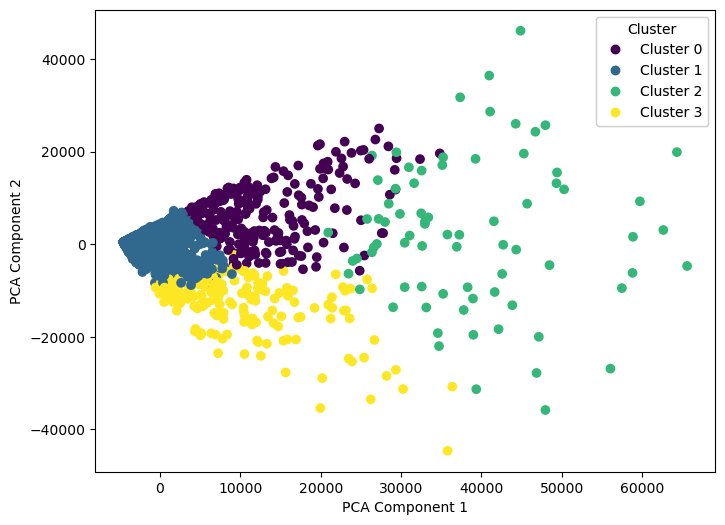

In [39]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Pivot the DataFrame to create a 3D array with entries as rows, features as columns, and dates as depth
user_data_3d = filtered_df.pivot(index='UserID', columns='Aggregate_Date', values=['Turnover', 'Hold', 'NumberofBets', 'YearofBirth', 'Interventiontype_first'])

# Fill missing values with zeros (if any)
user_data_3d = user_data_3d.fillna(0)

# Convert empty strings (' ') to float values of zero (0)
user_data_3d = user_data_3d.replace(' ', 0).astype(float)


user_data_3d = user_data_3d.astype(float)




# Convert the pivot table to a NumPy array
user_data_array = user_data_3d.to_numpy()

# Choose the number of clusters (k) based on your problem
k = 4 

# Perform K-means clustering
model = KMeans(n_clusters=k, random_state=0)
y_pred = model.fit_predict(user_data_array)

# Apply PCA to reduce dimensionality to 2D
pca = PCA(n_components=2)
user_data_pca = pca.fit_transform(user_data_array)


# Visualize the clustered entries using PCA components
plt.figure(figsize=(8, 6))
scatter = plt.scatter(user_data_pca[:, 0], user_data_pca[:, 1], c=y_pred, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')



    
cluster_dict={}

# Create a dictionary to store user IDs and cluster number
cluster_dict = {i: {'users': [], 'cluster_num': i} for i in range(k)}

# Loop through the cluster labels and append user IDs to the corresponding cluster
for user_id, cluster_label in zip(user_data_3d.index, y_pred):
    cluster_dict[cluster_label]['users'].append(user_id)

# Print the user IDs and cluster number in each cluster
for cluster_label, info in cluster_dict.items():
    print(f'Cluster {cluster_label} (Cluster {info["cluster_num"]}):\nUsers: {info["users"]}')
    
    
# Create a legend for the cluster numbers
legend_labels = [f'Cluster {info["cluster_num"]}' for info in cluster_dict.values()]
legend = plt.legend(handles=scatter.legend_elements()[0], title='Cluster', labels=legend_labels)
plt.gca().add_artist(legend)

plt.show()


In [161]:
user_31965 = filtered_df[filtered_df['UserID'] == 2609261]
print(user_31965)

         UserID  ProductType          Turnover               Hold  \
499010  2609261          2.0           31.3237            11.6164   
498823  2609261          2.0            0.5188            -0.0778   
498932  2609261          2.0           12.4516             2.4514   
499056  2609261          2.0           31.7803             0.2672   
499362  2609261          2.0           138.943           -10.7889   
...         ...          ...               ...                ...   
498991  2609261          2.0         49.328677          32.315723   
499550  2609261          2.0  582.529407319715   119.405052769452   
499542  2609261          2.0  356.580489156444  -91.3074733633913   
499503  2609261          2.0   460.53499911841   119.810584116269   
498849  2609261          2.0          2.680134            1.01267   

        NumberofBets Aggregate_Date  RG_case YearofBirth  RGsumevents  \
499010            27     2006-05-20        1        1971          1.0   
498823             1     

In [55]:
user_test = user_data_3d.loc[107124]

print(user_test)



                        Aggregate_Date
Turnover                2002-11-12        0.0
                        2002-11-13        0.0
                        2002-11-14        0.0
                        2002-11-15        0.0
                        2002-11-16        0.0
                                         ... 
Interventiontype_first  2010-11-06        0.0
                        2010-11-07        0.0
                        2010-11-08        0.0
                        2010-11-09        0.0
                        2010-11-10        0.0
Name: 107124, Length: 14570, dtype: float64


In [52]:
column_names = user_data_3d.columns
print(column_names)

MultiIndex([(              'Turnover', '2002-11-12'),
            (              'Turnover', '2002-11-13'),
            (              'Turnover', '2002-11-14'),
            (              'Turnover', '2002-11-15'),
            (              'Turnover', '2002-11-16'),
            (              'Turnover', '2002-11-17'),
            (              'Turnover', '2002-11-18'),
            (              'Turnover', '2002-11-19'),
            (              'Turnover', '2002-11-20'),
            (              'Turnover', '2002-11-22'),
            ...
            ('Interventiontype_first', '2010-11-01'),
            ('Interventiontype_first', '2010-11-02'),
            ('Interventiontype_first', '2010-11-03'),
            ('Interventiontype_first', '2010-11-04'),
            ('Interventiontype_first', '2010-11-05'),
            ('Interventiontype_first', '2010-11-06'),
            ('Interventiontype_first', '2010-11-07'),
            ('Interventiontype_first', '2010-11-08'),
            

In [65]:
user_data_pca

array([[ 21395.69545108, -11471.08939409],
       [ -4548.22767269,    415.95531599],
       [ -4490.58096226,    287.74012971],
       ...,
       [ -4500.1088517 ,    465.31014997],
       [ -3560.93751949,   1314.83693852],
       [ -4496.39534007,    464.97901797]])

In [66]:
y_pred

array([3, 1, 1, ..., 1, 1, 1])

In [140]:
# # Visualize the clustered entries using 'Turnover' vs 'Hold'
# plt.figure(figsize=(8, 6))
# plt.scatter(user_data_array[:, 0], user_data_array[:, 1], c=y_pred, cmap='viridis')
# plt.xlabel('Turnover')
# plt.ylabel('Hold')
# plt.title('K-means Clustering: Turnover vs Hold')

# # Create a legend for the cluster numbers
# legend_labels = [f'Cluster {cluster_num}' for cluster_num in range(k)]
# legend = plt.legend(handles=scatter.legend_elements()[0], title='Cluster', labels=legend_labels)
# plt.gca().add_artist(legend)
# plt.show()



In [139]:
# # Visualize the clustered entries using 'Turnover' vs 'NumberofBets'
# plt.figure(figsize=(8, 6))
# plt.scatter(user_data_array[:, 0], user_data_array[:, 2], c=y_pred, cmap='viridis')
# plt.xlabel('Turnover')
# plt.ylabel('NumberofBets')
# plt.title('K-means Clustering: Turnover vs NumberofBets')

# # Create a legend for the cluster numbers
# legend_labels = [f'Cluster {cluster_num}' for cluster_num in range(k)]
# legend = plt.legend(handles=scatter.legend_elements()[0], title='Cluster', labels=legend_labels)
# plt.gca().add_artist(legend)

# plt.show()

In [138]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from ipywidgets import interact

from ipywidgets import interact, DatePicker

# Assuming user_data_array contains your data and y_pred contains cluster labels

# Define the date range based on your data


# Create a function to plot the clustering results for a specific time frame
def plot_clusters(time_frame):
    print(time_frame)
    start_date = '2002-11-12' #).date()
        # Extract the year from the time_frame and construct a new start_date
    start_year = str(int(time_frame))
    start_date = pd.to_datetime(start_year + '-11-12')
    
    plt.figure(figsize=(8, 6))
    plt.scatter(user_data_3d['NumberofBets'][start_date], user_data_3d['Hold'][start_date], c=y_pred, cmap='viridis')
   # plt.scatter(user_data_array[:, 0], user_data_array[:, 2], c=y_pred, cmap='viridis')
    plt.xlabel('NumberofBets')
    plt.ylabel('Hold')
    plt.title(f'K-means Clustering: NumberofBets vs Hold (Time Frame {time_frame})')
    
    # Filter data for the selected time frame and adjust the data_array and y_pred accordingly
    # For example, you can filter data based on dates
    # filtered_data_array = user_data_array[time_frame_condition]
    # filtered_y_pred = y_pred[time_frame_condition]
    
    # Scatter plot the filtered data
    # plt.scatter(filtered_data_array[:, 0], filtered_data_array[:, 2], c=filtered_y_pred, cmap='viridis')
    
    plt.show()
    

start_date='2002-11-12'
end_date='2010-11-10'




# Create the interaction using the date pickers
interact(plot_clusters, time_frame=(2002, 2010))

interactive(children=(IntSlider(value=2006, description='time_frame', max=2010, min=2002), Output()), _dom_cla…

<function __main__.plot_clusters(time_frame)>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [134]:
#print(*user_data_3d.columns)


In [96]:
user_data_3d['Turnover']['2002-11-12']

UserID
31965      20.0
32639       0.0
36822       0.0
36916       0.0
74438       0.0
           ... 
9806890     0.0
9807483     0.0
9820476     0.0
9822065     0.0
9859152     0.0
Name: 2002-11-12 00:00:00, Length: 3161, dtype: float64

In [75]:
user_data_3d.columns
#2002-11-12 
#2010-11-10

MultiIndex([(              'Turnover', '2002-11-12'),
            (              'Turnover', '2002-11-13'),
            (              'Turnover', '2002-11-14'),
            (              'Turnover', '2002-11-15'),
            (              'Turnover', '2002-11-16'),
            (              'Turnover', '2002-11-17'),
            (              'Turnover', '2002-11-18'),
            (              'Turnover', '2002-11-19'),
            (              'Turnover', '2002-11-20'),
            (              'Turnover', '2002-11-22'),
            ...
            ('Interventiontype_first', '2010-11-01'),
            ('Interventiontype_first', '2010-11-02'),
            ('Interventiontype_first', '2010-11-03'),
            ('Interventiontype_first', '2010-11-04'),
            ('Interventiontype_first', '2010-11-05'),
            ('Interventiontype_first', '2010-11-06'),
            ('Interventiontype_first', '2010-11-07'),
            ('Interventiontype_first', '2010-11-08'),
            

In [135]:
user_data_3d

Turnover                                              \
Aggregate_Date 2002-11-12 2002-11-13 2002-11-14 2002-11-15 2002-11-16   
UserID                                                                  
31965                20.0        0.0      73.18       10.0     163.28   
32639                 0.0        0.0       0.00        0.0       0.00   
36822                 0.0        0.0       0.00        0.0       0.00   
36916                 0.0        0.0       0.00        0.0       0.00   
74438                 0.0        0.0       0.00        0.0       0.00   
...                   ...        ...        ...        ...        ...   
9806890               0.0        0.0       0.00        0.0       0.00   
9807483               0.0        0.0       0.00        0.0       0.00   
9820476               0.0        0.0       0.00        0.0       0.00   
9822065               0.0        0.0       0.00        0.0       0.00   
9859152               0.0        0.0       0.00        0.0       0.00   

                                                                       ...  \
Aggregate_Date 2002-11-17 2002-11-18 2002-11-19 2002-11-20 2002-11-22  ...   
UserID                                                                 ...   
31965              162.34      156.0       3.74       80.0        0.0  ...   
32639                0.00        0.0       0.00        0.0        0.0  ...   
36822                0.00        0.0       0.00        0.0        0.0  ...   
36916                0.00        0.0       0.00        0.0        0.0  ...   
74438                0.00        0.0       0.00        0.0        0.0  ...   
...                   ...        ...        ...        ...        ...  ...   
9806890              0.00        0.0       0.00        0.0        0.0  ...   
9807483              0.00        0.0       0.00        0.0        0.0  ...   
9820476              0.00        0.0       0.00        0.0        0.0  ...   
9822065              0.00        0.0       0.00        0.0        0.0  ...   
9859152              0.00        0.0       0.00        0.0        0.0  ...   

               Interventiontype_first                                   \
Aggregate_Date             2010-11-01 2010-11-02 2010-11-03 2010-11-04   
UserID                                                                   
31965                             0.0        0.0        0.0        8.0   
32639                             0.0        0.0        0.0        0.0   
36822                             0.0        0.0        0.0        0.0   
36916                             0.0        0.0        0.0        0.0   
74438                             0.0        0.0        0.0        0.0   
...                               ...        ...        ...        ...   
9806890                           0.0        0.0        0.0        0.0   
9807483                           0.0        0.0        0.0        0.0   
9820476                           0.0        0.0        0.0        0.0   
9822065                           0.0        0.0        0.0        0.0   
9859152                           0.0        0.0        0.0        0.0   

                                                                       \
Aggregate_Date 2010-11-05 2010-11-06 2010-11-07 2010-11-08 2010-11-09   
UserID                                                                  
31965                 0.0        8.0        0.0        0.0        0.0   
32639                 0.0        0.0        0.0        0.0        0.0   
36822                 0.0        0.0        0.0        0.0        0.0   
36916                 0.0        0.0        0.0        0.0        0.0   
74438                 0.0        0.0        0.0        0.0        0.0   
...                   ...        ...        ...        ...        ...   
9806890               0.0        0.0        0.0        0.0        0.0   
9807483               0.0        0.0        0.0        0.0        0.0   
9820476               0.0        0.0        0.0        0.0   

In [ ]:
user_data_3d


In [ ]:
user_id = 36822

user_data_for_user1 = user_data_3d.loc[user_id, :]
print("Data for user 1 for all dates:", user_data_for_user1)

In [ ]:
print(user_data_for_user1)

In [ ]:
import matplotlib.pyplot as plt

user_id = 74438
user_data_for_user1 = user_data_3d.loc[user_id, 'Turnover']

# Extract the turnover values
turnover_values = user_data_for_user1.to_numpy()

# Extract the corresponding date indices
dates = user_data_for_user1.index.get_level_values('Aggregate_Date')

# Plot the turnover values against dates
plt.figure(figsize=(10, 6))
plt.plot(dates, turnover_values, marker='o', linestyle='-')
plt.title(f'Turnover Values for User {user_id}')
plt.xlabel('Date')
plt.ylabel('Turnover')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# List of 10 user IDs to plot
user_ids_to_plot = [74438,31965] 

# Create a subplot for the graph
plt.figure(figsize=(12, 8))
plt.title('Turnover Values for 10 Users')
plt.xlabel('Date')
plt.ylabel('Turnover')
plt.grid(True)

for user_id in user_ids_to_plot:
    
#     user_data_for_user1 = user_data_3d.loc[user_id, 'Turnover']

# # Extract the turnover values
# turnover_values = user_data_for_user1.to_numpy()

# # Extract the corresponding date indices
# dates = user_data_for_user1.index.get_level_values('Aggregate_Date')

    
    
    user_data_for_user = user_data_3d.loc[user_id, 'Turnover']
    
    # Extract the turnover values
    turnover_values = user_data_for_user.to_numpy()
    
    # Extract the corresponding date indices
    dates = user_data_for_user.index.get_level_values('Aggregate_Date')
    
    # Plot the turnover values against dates
    plt.plot(dates, turnover_values, marker='o', linestyle='-', label=f'User {user_id}')

# Add a legend to differentiate the users
plt.legend(loc='upper right')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [ ]:
user_data_array #[user_data_3d['UserID']=='31965']

In [ ]:
# testing k means with dummy data

In [ ]:


# Sample DataFrame (replace this with your actual DataFrame)
user_agg = pd.DataFrame({
    'user_id': [1, 1, 3, 2, 3, 3, 4, 5],
    'date': ['2023-01-01', '2023-01-02', '2023-01-09', '2023-01-04', '2023-01-01', '2023-01-04', '2023-01-03', '2023-01-02'],
    'turnover': [10.5, 12.0, 8.0, 9.0, 15.0, 14.5, 15.0, 14.5],
    'hold': [20.0, 21.0, 18.0, 19.0, 25.0, 24.5, 15.0, 14.5],
    'loss': [5.0, 4.0, 3.0, 2.0, 1.5, 2.5, 15.0, 14.5],
    'amountinvested': [100.0, 110.0, 95.0, 105.0, 120.0, 130.0, 15.0, 14.5],
    'rgtype': [1, 2, 1, 1, 2, 2, 1, 3]
})

# Convert the 'date' column to a datetime object
user_agg['date'] = pd.to_datetime(user_agg['date'])

# Sort the DataFrame by 'user_id' and 'date'
user_agg_sorted = user_agg.sort_values(by=['user_id', 'date'])

# Pivot the DataFrame to create a 3D array with entries as rows, features as columns, and dates as depth
user_data_3d = user_agg.pivot(index='user_id', columns='date', values=['turnover', 'hold', 'loss', 'amountinvested', 'rgtype'])

# Fill missing values with zeros (if any)
user_data_3d = user_data_3d.fillna(0)

# Convert the pivot table to a NumPy array
user_data_array = user_data_3d.to_numpy()

# Choose the number of clusters (k) based on your problem
k = 3  

# Perform K-means clustering
model = KMeans(n_clusters=k, random_state=0)
y_pred = model.fit_predict(user_data_array)

# Apply PCA to reduce dimensionality to 2D
pca = PCA(n_components=2)
user_data_pca = pca.fit_transform(user_data_array)


# Visualize the clustered entries using PCA components
plt.figure(figsize=(8, 6))
scatter = plt.scatter(user_data_pca[:, 0], user_data_pca[:, 1], c=y_pred, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')


# Create a legend for the cluster numbers
legend_labels = [f'Cluster {info["cluster_num"]}' for info in cluster_dict.values()]
legend = plt.legend(handles=scatter.legend_elements()[0], title='Cluster', labels=legend_labels)
plt.gca().add_artist(legend)

plt.show()
    

# # Create a dictionary to store user IDs and cluster number
# cluster_dict = {i: {'users': [], 'cluster_num': i} for i in range(k)}

# # Loop through the cluster labels and append user IDs to the corresponding cluster
# for user_id, cluster_label in zip(user_agg['user_id'], y_pred):
#     cluster_dict[cluster_label]['users'].append(user_id)

# # Print the user IDs and cluster number in each cluster
# for cluster_label, info in cluster_dict.items():
#     print(f'Cluster {cluster_label} (Cluster {info["cluster_num"]}):\nUsers: {info["users"]}')


# Create a dictionary to store user IDs and cluster number
cluster_dict = {i: {'users': [], 'cluster_num': i} for i in range(k)}

# Loop through the cluster labels and append user IDs to the corresponding cluster
for user_id, cluster_label in zip(user_data_3d.index, y_pred):
    cluster_dict[cluster_label]['users'].append(user_id)

# Print the user IDs and cluster number in each cluster
for cluster_label, info in cluster_dict.items():
    print(f'Cluster {cluster_label} (Cluster {info["cluster_num"]}):\nUsers: {info["users"]}')


In [ ]:
user_data_3d

In [ ]:
user_id = 1
date = pd.to_datetime('2023-01-01')
turnover_value = user_data_3d.loc[user_id, ('turnover', date)]
print("Turnover for user 1 on 2023-01-01:", turnover_value)


In [ ]:
print(y_pred)

In [162]:
filtered_df

,UserID,ProductType,Turnover,Hold,NumberofBets,Aggregate_Date,RG_case,YearofBirth,RGsumevents,Event_type_first,Interventiontype_first
402,31965,2.0,20.0,20.0,1,2002-11-12,1,1971,1.0,2.0,8
1002,31965,2.0,73.18,18.96,6,2002-11-14,1,1971,1.0,2.0,8
403,31965,2.0,10.0,10.0,1,2002-11-15,1,1971,1.0,2.0,8
1217,31965,2.0,163.28,19.0,9,2002-11-16,1,1971,1.0,2.0,8
1331,31965,2.0,162.34,-97.5,13,2002-11-17,1,1971,1.0,2.0,8
...,...,...,...,...,...,...,...,...,...,...,...
973451,9822065,2.0,10.0,10.0,1,2010-02-09,1,1963,1.0,4.0,13
973463,9822065,2.0,15.0,-3.35,1,2010-03-02,1,1963,1.0,4.0,13
973452,9822065,2.0,1.0,1.0,1,2010-04-21,1,1963,1.0,4.0,13
973456,9822065,2.0,1.0,-2.8,1,2010-06-10,1,1963,1.0,4.0,13


In [ ]:
# features to consider : turnover, hold , number of bets for time series prediction

In [266]:
moderate_addicted_players= [107124, 109445, 332091, 403944, 420681, 535025, 676437, 708122, 717922, 731018, 734038, 839105, 893392, 905798, 986289, 1054028, 1055097, 1128286, 1191883, 1205205, 1280671, 1301389, 1321102, 1330470, 1362354, 1376503, 1444002, 1444690, 1458694, 1467720, 1476237, 1575816, 1613141, 1691317, 1741128, 1745784, 1792037, 1812446, 1834053, 1866785, 1886970, 2015501, 2027653, 2037459, 2059854, 2107517, 2117010, 2150296, 2215644, 2251748, 2258689, 2299626, 2312117, 2510850, 2560163, 2566614, 2580478, 2595325, 2606689, 2614721, 2685297, 2689756, 2710254, 2783309, 2787151, 2794275, 2803911, 2832999, 2912319, 2930403, 2947836, 2983951, 2999195, 2999207, 3033642, 3176106, 3186379, 3302342, 3315310, 3424027, 3431103, 3438352, 3457670, 3458145, 3461699, 3474092, 3495839, 3496350, 3517053, 3559230, 3566841, 3618875, 3622203, 3636161, 3688036, 3776825, 3805497, 3810030, 3841216, 3858441, 3904166, 3914709, 4010854, 4022654, 4039888, 4136167, 4161293, 4214808, 4223135, 4227877, 4241294, 4267728, 4301894, 4338065, 4342173, 4343190, 4348335, 4361395, 4364542, 4391886, 4432017, 4475391, 4523711, 4526190, 4579343, 4597571, 4600997, 4608302, 4686195, 4734610, 4738703, 4754574, 4778231, 4837595, 4867029, 4867936, 4882865, 4890437, 4909756, 4932146, 4963002, 4996838, 5021938, 5046922, 5133765, 5160540, 5164325, 5313336, 5320445, 5326898, 5345825, 5372244, 5549778, 5554333, 5560128, 5592984, 5670707, 5678031, 5678852, 5781728, 5825306, 5826900, 5833825, 5857632, 5911218, 5961595, 5962099, 5962652, 5986101, 6055498, 6086787, 6126648, 6175402, 6176615, 6203853, 6206370, 6210682, 6216479, 6217359, 6237966, 6239380, 6283338, 6286166, 6353958, 6363863, 6392668, 6395232, 6427788, 6462869, 6465687, 6485628, 6562294, 6577298, 6606784, 6649792, 6691324, 6698316, 6703614, 6709379, 6727436, 6818258, 6826846, 6860191, 6872908, 6875004, 6884788, 7015624, 7062960, 7069475, 7092024, 7139334, 7153205, 7165714, 7192925, 7193066, 7196221, 7260144, 7289279, 7318774, 7332704, 7335300, 7339107, 7390814, 7403363, 7462955, 7472343, 7505656, 7505796, 7606420, 7729448, 7831028, 8026715, 8037545, 8148005, 8182233, 8381254, 8495659, 8582643, 8656794, 8804356, 8933678, 9065100, 9099550]
count = len(moderate_addicted_players)
print("Count of moderate addicted players:", count)


Count of moderate addicted players: 243


In [196]:
user_data_3d

Turnover                                              \
Aggregate_Date 2002-11-12 2002-11-13 2002-11-14 2002-11-15 2002-11-16   
UserID                                                                  
31965                20.0        0.0      73.18       10.0     163.28   
32639                 0.0        0.0       0.00        0.0       0.00   
36822                 0.0        0.0       0.00        0.0       0.00   
36916                 0.0        0.0       0.00        0.0       0.00   
74438                 0.0        0.0       0.00        0.0       0.00   
...                   ...        ...        ...        ...        ...   
9806890               0.0        0.0       0.00        0.0       0.00   
9807483               0.0        0.0       0.00        0.0       0.00   
9820476               0.0        0.0       0.00        0.0       0.00   
9822065               0.0        0.0       0.00        0.0       0.00   
9859152               0.0        0.0       0.00        0.0       0.00   

                                                                       ...  \
Aggregate_Date 2002-11-17 2002-11-18 2002-11-19 2002-11-20 2002-11-22  ...   
UserID                                                                 ...   
31965              162.34      156.0       3.74       80.0        0.0  ...   
32639                0.00        0.0       0.00        0.0        0.0  ...   
36822                0.00        0.0       0.00        0.0        0.0  ...   
36916                0.00        0.0       0.00        0.0        0.0  ...   
74438                0.00        0.0       0.00        0.0        0.0  ...   
...                   ...        ...        ...        ...        ...  ...   
9806890              0.00        0.0       0.00        0.0        0.0  ...   
9807483              0.00        0.0       0.00        0.0        0.0  ...   
9820476              0.00        0.0       0.00        0.0        0.0  ...   
9822065              0.00        0.0       0.00        0.0        0.0  ...   
9859152              0.00        0.0       0.00        0.0        0.0  ...   

               Interventiontype_first                                   \
Aggregate_Date             2010-11-01 2010-11-02 2010-11-03 2010-11-04   
UserID                                                                   
31965                             0.0        0.0        0.0        8.0   
32639                             0.0        0.0        0.0        0.0   
36822                             0.0        0.0        0.0        0.0   
36916                             0.0        0.0        0.0        0.0   
74438                             0.0        0.0        0.0        0.0   
...                               ...        ...        ...        ...   
9806890                           0.0        0.0        0.0        0.0   
9807483                           0.0        0.0        0.0        0.0   
9820476                           0.0        0.0        0.0        0.0   
9822065                           0.0        0.0        0.0        0.0   
9859152                           0.0        0.0        0.0        0.0   

                                                                       \
Aggregate_Date 2010-11-05 2010-11-06 2010-11-07 2010-11-08 2010-11-09   
UserID                                                                  
31965                 0.0        8.0        0.0        0.0        0.0   
32639                 0.0        0.0        0.0        0.0        0.0   
36822                 0.0        0.0        0.0        0.0        0.0   
36916                 0.0        0.0        0.0        0.0        0.0   
74438                 0.0        0.0        0.0        0.0        0.0   
...                   ...        ...        ...        ...        ...   
9806890               0.0        0.0        0.0        0.0        0.0   
9807483               0.0        0.0        0.0        0.0        0.0   
9820476               0.0        0.0        0.0        0.0   

In [193]:
x_single_user_turnover=user_data_3d['Turnover'][user_data_3d.index == 31965  ]
x_single_user_turnover.describe
x_single_user_turnover_ravel=x_single_user_turnover.values.ravel()
x_single_user_turnover_ravel

array([20.  ,  0.  , 73.18, ...,  0.  ,  0.  ,  0.  ])

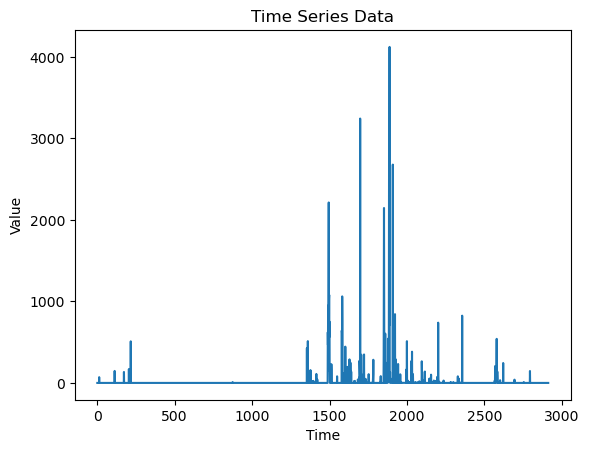

ADF Statistic: -8.506405081551636
p-value: 1.1996062160562233e-13
Critical Values: {'1%': -3.432616316430259, '5%': -2.8625413057019142, '10%': -2.567303023769193}
The time series is stationary.


In [251]:
user_data_3d_timeseries_stationarity_check=user_data_3d
moderate_addicted_players= [107124, 109445, 332091, 403944, 420681, 535025, 676437, 708122, 717922, 731018, 734038, 839105, 893392, 905798, 986289, 1054028, 1055097, 1128286, 1191883, 1205205, 1280671, 1301389, 1321102, 1330470, 1362354, 1376503, 1444002, 1444690, 1458694, 1467720, 1476237, 1575816, 1613141, 1691317, 1741128, 1745784, 1792037, 1812446, 1834053, 1866785, 1886970, 2015501, 2027653, 2037459, 2059854, 2107517, 2117010, 2150296, 2215644, 2251748, 2258689, 2299626, 2312117, 2510850, 2560163, 2566614, 2580478, 2595325, 2606689, 2614721, 2685297, 2689756, 2710254, 2783309, 2787151, 2794275, 2803911, 2832999, 2912319, 2930403, 2947836, 2983951, 2999195, 2999207, 3033642, 3176106, 3186379, 3302342, 3315310, 3424027, 3431103, 3438352, 3457670, 3458145, 3461699, 3474092, 3495839, 3496350, 3517053, 3559230, 3566841, 3618875, 3622203, 3636161, 3688036, 3776825, 3805497, 3810030, 3841216, 3858441, 3904166, 3914709, 4010854, 4022654, 4039888, 4136167, 4161293, 4214808, 4223135, 4227877, 4241294, 4267728, 4301894, 4338065, 4342173, 4343190, 4348335, 4361395, 4364542, 4391886, 4432017, 4475391, 4523711, 4526190, 4579343, 4597571, 4600997, 4608302, 4686195, 4734610, 4738703, 4754574, 4778231, 4837595, 4867029, 4867936, 4882865, 4890437, 4909756, 4932146, 4963002, 4996838, 5021938, 5046922, 5133765, 5160540, 5164325, 5313336, 5320445, 5326898, 5345825, 5372244, 5549778, 5554333, 5560128, 5592984, 5670707, 5678031, 5678852, 5781728, 5825306, 5826900, 5833825, 5857632, 5911218, 5961595, 5962099, 5962652, 5986101, 6055498, 6086787, 6126648, 6175402, 6176615, 6203853, 6206370, 6210682, 6216479, 6217359, 6237966, 6239380, 6283338, 6286166, 6353958, 6363863, 6392668, 6395232, 6427788, 6462869, 6465687, 6485628, 6562294, 6577298, 6606784, 6649792, 6691324, 6698316, 6703614, 6709379, 6727436, 6818258, 6826846, 6860191, 6872908, 6875004, 6884788, 7015624, 7062960, 7069475, 7092024, 7139334, 7153205, 7165714, 7192925, 7193066, 7196221, 7260144, 7289279, 7318774, 7332704, 7335300, 7339107, 7390814, 7403363, 7462955, 7472343, 7505656, 7505796, 7606420, 7729448, 7831028, 8026715, 8037545, 8148005, 8182233, 8381254, 8495659, 8582643, 8656794, 8804356, 8933678, 9065100, 9099550]



x_single_user_turnover=user_data_3d_timeseries_stationarity_check['Turnover'][user_data_3d_timeseries_stationarity_check.index == 107124  ]
x_single_user_turnover.describe
x_single_user_turnover_ravel=x_single_user_turnover.values.ravel()
x_single_user_turnover_ravel


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


# Plot the time series to visualize it
plt.plot(x_single_user_turnover_ravel)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series Data')
plt.show()

# Perform the ADF test
result = adfuller(x_single_user_turnover_ravel)

# Print the test result
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# Check if the time series is stationary based on the p-value
if result[1] <= 0.05:
    print('The time series is stationary.')
else:
    print('The time series is not stationary.')


In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Create a copy of the DataFrame to add the 'is_stationary' column
user_data_3d_timeseries_stationarity_check_copy = user_data_3d_timeseries_stationarity_check.copy()

# List of user IDs to check
moderate_addicted_players = [107124, 109445, 332091, 403944, 420681, 535025, 676437, 708122, 717922, 731018, 734038, 839105, 893392, 905798, 986289, 1054028, 1055097, 1128286, 1191883, 1205205, 1280671, 1301389, 1321102, 1330470, 1362354, 1376503, 1444002, 1444690, 1458694, 1467720, 1476237, 1575816, 1613141, 1691317, 1741128, 1745784, 1792037, 1812446, 1834053, 1866785, 1886970, 2015501, 2027653, 2037459, 2059854, 2107517, 2117010, 2150296, 2215644, 2251748, 2258689, 2299626, 2312117, 2510850, 2560163, 2566614, 2580478, 2595325, 2606689, 2614721, 2685297, 2689756, 2710254, 2783309, 2787151, 2794275, 2803911, 2832999, 2912319, 2930403, 2947836, 2983951, 2999195, 2999207, 3033642, 3176106, 3186379, 3302342, 3315310, 3424027, 3431103, 3438352, 3457670, 3458145, 3461699, 3474092, 3495839, 3496350, 3517053, 3559230, 3566841, 3618875, 3622203, 3636161, 3688036, 3776825, 3805497, 3810030, 3841216, 3858441, 3904166, 3914709, 4010854, 4022654, 4039888, 4136167, 4161293, 4214808, 4223135, 4227877, 4241294, 4267728, 4301894, 4338065, 4342173, 4343190, 4348335, 4361395, 4364542, 4391886, 4432017, 4475391, 4523711, 4526190, 4579343, 4597571, 4600997, 4608302, 4686195, 4734610, 4738703, 4754574, 4778231, 4837595, 4867029, 4867936, 4882865, 4890437, 4909756, 4932146, 4963002, 4996838, 5021938, 5046922, 5133765, 5160540, 5164325, 5313336, 5320445, 5326898, 5345825, 5372244, 5549778, 5554333, 5560128, 5592984, 5670707, 5678031, 5678852, 5781728, 5825306, 5826900, 5833825, 5857632, 5911218, 5961595, 5962099, 5962652, 5986101, 6055498, 6086787, 6126648, 6175402, 6176615, 6203853, 6206370, 6210682, 6216479, 6217359, 6237966, 6239380, 6283338, 6286166, 6353958, 6363863, 6392668, 6395232, 6427788, 6462869, 6465687, 6485628, 6562294, 6577298, 6606784, 6649792, 6691324, 6698316, 6703614, 6709379, 6727436, 6818258, 6826846, 6860191, 6872908, 6875004, 6884788, 7015624, 7062960, 7069475, 7092024, 7139334, 7153205, 7165714, 7192925, 7193066, 7196221, 7260144, 7289279, 7318774, 7332704, 7335300, 7339107, 7390814, 7403363, 7462955, 7472343, 7505656, 7505796, 7606420, 7729448, 7831028, 8026715, 8037545, 8148005, 8182233, 8381254, 8495659, 8582643, 8656794, 8804356, 8933678, 9065100, 9099550]

# Iterate through the list of user IDs
for user_id in moderate_addicted_players:
    # Extract the user's turnover data
    user_turnover = user_data_3d_timeseries_stationarity_check['Turnover'][user_data_3d_timeseries_stationarity_check.index == user_id].values.ravel()
    
    # Perform the ADF test
    result = adfuller(user_turnover)
    
    # Check if the time series is stationary based on the p-value
    if result[1] <= 0.05:
        is_stationary = 1  # Stationary
    else:
        is_stationary = 0  # Not stationary
    
  # Update the 'is_stationary' column in the DataFrame
    user_data_3d_timeseries_stationarity_check_copy.loc[user_data_3d_timeseries_stationarity_check_copy.index == user_id, 'is_stationary'] = is_stationary

# Print the updated DataFrame
print(user_data_3d_timeseries_stationarity_check_copy)

                 Turnover                                              \
Aggregate_Date 2002-11-12 2002-11-13 2002-11-14 2002-11-15 2002-11-16   
UserID                                                                  
31965                20.0        0.0      73.18       10.0     163.28   
32639                 0.0        0.0       0.00        0.0       0.00   
36822                 0.0        0.0       0.00        0.0       0.00   
36916                 0.0        0.0       0.00        0.0       0.00   
74438                 0.0        0.0       0.00        0.0       0.00   
...                   ...        ...        ...        ...        ...   
9806890               0.0        0.0       0.00        0.0       0.00   
9807483               0.0        0.0       0.00        0.0       0.00   
9820476               0.0        0.0       0.00        0.0       0.00   
9822065               0.0        0.0       0.00        0.0       0.00   
9859152               0.0        0.0       0.00    

In [202]:
# user_data_3d_timeseries_stationarity_check_copy.index==31965

array([ True, False, False, ..., False, False, False])

In [213]:
# user_31965 = user_data_3d_timeseries_stationarity_check_copy[user_data_3d_timeseries_stationarity_check_copy.index == 107124]
# print(user_31965['is_stationary'].values)

[[1.]]


In [240]:
# Separate DataFrames based on the 'is_stationary' column
stationary_users = user_data_3d_timeseries_stationarity_check_copy[user_data_3d_timeseries_stationarity_check_copy['is_stationary'] == '1']
non_stationary_users = user_data_3d_timeseries_stationarity_check_copy[user_data_3d_timeseries_stationarity_check_copy['is_stationary'] == '0']


# # Function to check if all values in a row are null or NaN (excluding the last column)
# def is_all_null_except_last(row):
#     return all(pd.isna(row[:-1]))

# # Remove rows with all NaN or null values in each DataFrame (excluding the last column)
# stationary_users = stationary_users[~stationary_users.apply(is_all_null_except_last, axis=1)]
# non_stationary_users = non_stationary_users[~non_stationary_users.apply(is_all_null_except_last, axis=1)]

# # Print the two DataFrames after removing rows with all NaN or null values (excluding the last column)
# print("Stationary Users:")
# print(stationary_users)

# print("\nNon-Stationary Users:")
# print(non_stationary_users)


In [243]:
user_data_3d_timeseries_stationarity_check_copy['Turnover']

Aggregate_Date,2002-11-12,2002-11-13,2002-11-14,2002-11-15,2002-11-16,2002-11-17,2002-11-18,2002-11-19,2002-11-20,2002-11-22,...,2010-11-01,2010-11-02,2010-11-03,2010-11-04,2010-11-05,2010-11-06,2010-11-07,2010-11-08,2010-11-09,2010-11-10
UserID,,,,,,,,,,,,,,,,,,,,,
31965,20.0,0.0,73.18,10.0,163.28,162.34,156.0,3.74,80.0,0.0,...,0.0,0.0,0.0,43.55,0.0,146.4,0.0,0.0,0.0,0.0
32639,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
36822,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
36916,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
74438,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9806890,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
9807483,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
9820476,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0


In [250]:
#8656794

user_31965 = stationary_users[stationary_users.index == 107124]
print(user_31965)

                 Turnover                                              \
Aggregate_Date 2002-11-12 2002-11-13 2002-11-14 2002-11-15 2002-11-16   
UserID                                                                  
107124                NaN        NaN        NaN        NaN        NaN   

                                                                       ...  \
Aggregate_Date 2002-11-17 2002-11-18 2002-11-19 2002-11-20 2002-11-22  ...   
UserID                                                                 ...   
107124                NaN        NaN        NaN        NaN        NaN  ...   

               Interventiontype_first                                   \
Aggregate_Date             2010-11-02 2010-11-03 2010-11-04 2010-11-05   
UserID                                                                   
107124                            NaN        NaN        NaN        NaN   

                                                                       \
Aggregate_Date 2010-11-0

nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan 

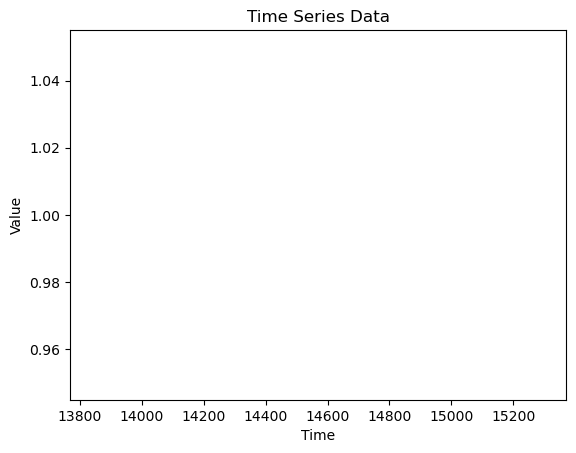

In [231]:
x_single_user_turnover=stationary_users[stationary_users.index == 8656794]

x_single_user_turnover_ravel=x_single_user_turnover.values.ravel()
x_single_user_turnover_ravel
print(*x_single_user_turnover_ravel)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


# Plot the time series to visualize it
plt.plot(x_single_user_turnover_ravel)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series Data')
plt.show()


In [257]:
# Create a dictionary to store user IDs and their corresponding 'is_stationary' values
is_stationary_data = {'UserID': moderate_addicted_players, 'is_stationary': []}

# Iterate through the list of user IDs
for user_id in moderate_addicted_players:
    # Extract the user's turnover data
    user_turnover = user_data_3d_timeseries_stationarity_check['Turnover'][user_data_3d_timeseries_stationarity_check.index == user_id].values.ravel()
    
    # Perform the ADF test
    result = adfuller(user_turnover)
    
    # Check if the time series is stationary based on the p-value
    if result[1] <= 0.05:
        is_stationary = 1  # Stationary
    else:
        is_stationary = 0  # Not stationary
    
    # Append the 'is_stationary' value to the list
    is_stationary_data['is_stationary'].append(is_stationary)

# Create a new DataFrame from the dictionary
is_stationary_df = pd.DataFrame(is_stationary_data)

# Print the new DataFrame
print(is_stationary_df)


      UserID  is_stationary
0     107124              1
1     109445              1
2     332091              1
3     403944              1
4     420681              1
..       ...            ...
238  8656794              1
239  8804356              1
240  8933678              1
241  9065100              1
242  9099550              1

[243 rows x 2 columns]


In [258]:
# Print the new DataFrame
print(*is_stationary_df)

UserID is_stationary


In [247]:
is_stationary_df['is_stationary'].value_counts()


1    235
0      8
Name: is_stationary, dtype: int64

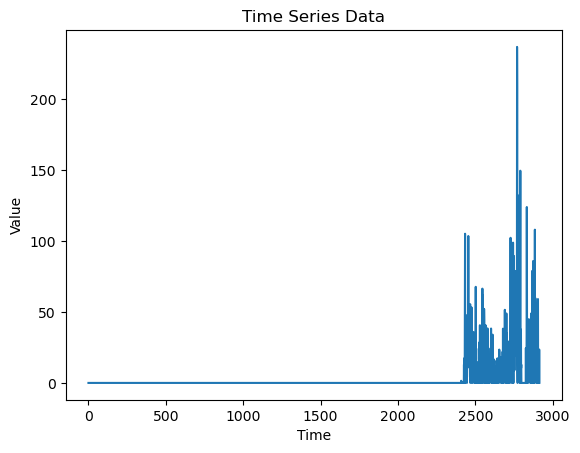

In [260]:
x_single_user_turnover=user_data_3d_timeseries_stationarity_check['Turnover'][user_data_3d_timeseries_stationarity_check.index == 8933678  ]
x_single_user_turnover.describe
x_single_user_turnover_ravel=x_single_user_turnover.values.ravel()
x_single_user_turnover_ravel


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


# Plot the time series to visualize it
plt.plot(x_single_user_turnover_ravel)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series Data')
plt.show()


In [267]:
x_single_user_turnover_ravel

array([ 0.  ,  0.  ,  0.  , ...,  0.  , 23.55,  0.  ])

C:\Users\abhiv\AppData\Local\Temp\ipykernel_10620\3556031890.py:10: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_index = pd.date_range(start=time_index[-1], periods=forecast_steps + 1, closed='right')


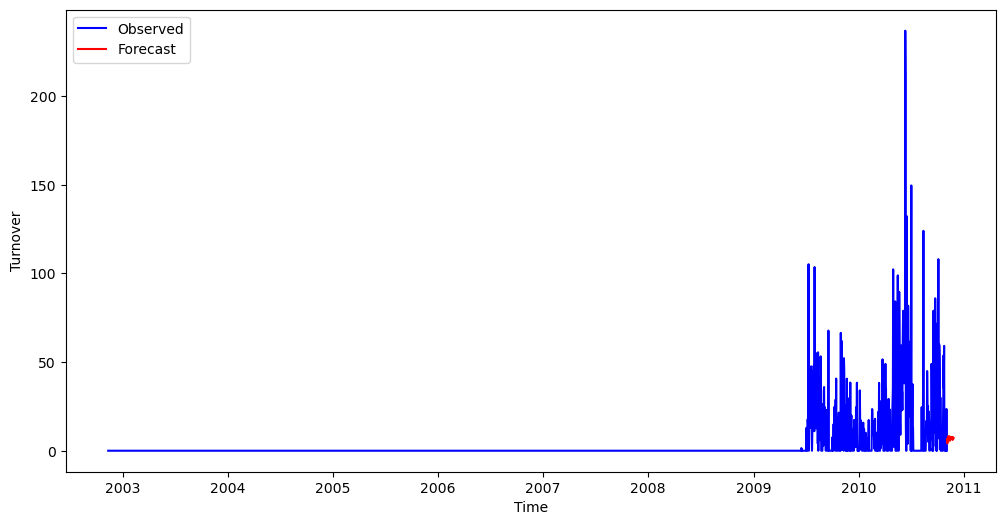

In [271]:
# Forecast future values for 24 periods
forecast_steps = 24
forecast = sarima_result.get_forecast(steps=forecast_steps)

# Inverse difference to obtain forecasts in the original scale
forecasted_diff = forecast.predicted_mean
forecasted_values = np.cumsum([x_single_user_turnover_ravel[-1]] + forecasted_diff)

# Create an index for the forecasted periods
forecast_index = pd.date_range(start=time_index[-1], periods=forecast_steps + 1, closed='right')

# Plot the original data and the extended forecasted values
plt.figure(figsize=(12, 6))
plt.plot(time_index, x_single_user_turnover_ravel, label='Observed', color='blue')
plt.plot(forecast_index, forecasted_values, label='Forecast', color='red')
plt.xlabel('Time')
plt.ylabel('Turnover')
plt.legend()
plt.show()
